# Analyze activation values

### Load data

In [1]:
import numpy as np

fast_model_fast_data = np.load("nighttime_ai_fast_model_fast_data_activations.npy")
fast_model_slow_data = np.load("nighttime_ai_fast_model_slow_data_activations.npy")
slow_model_fast_data = np.load("nighttime_ai_slow_model_fast_data_activations.npy")
slow_model_slow_data = np.load("nighttime_ai_slow_model_slow_data_activations.npy")

[d.shape for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[(19250, 256), (20304, 256), (19250, 256), (20304, 256)]

In [2]:
# check if ReLu was applied
[np.min(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[0.0, 0.0, 0.0, 0.0]

In [3]:
[np.max(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[3.988, 3.594, 4.88, 4.64]

In [4]:
[np.mean(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[0.266, 0.2834, 0.2073, 0.3042]

In [5]:
[np.median(d) for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[0.0, 0.0, 0.0, 0.007706]

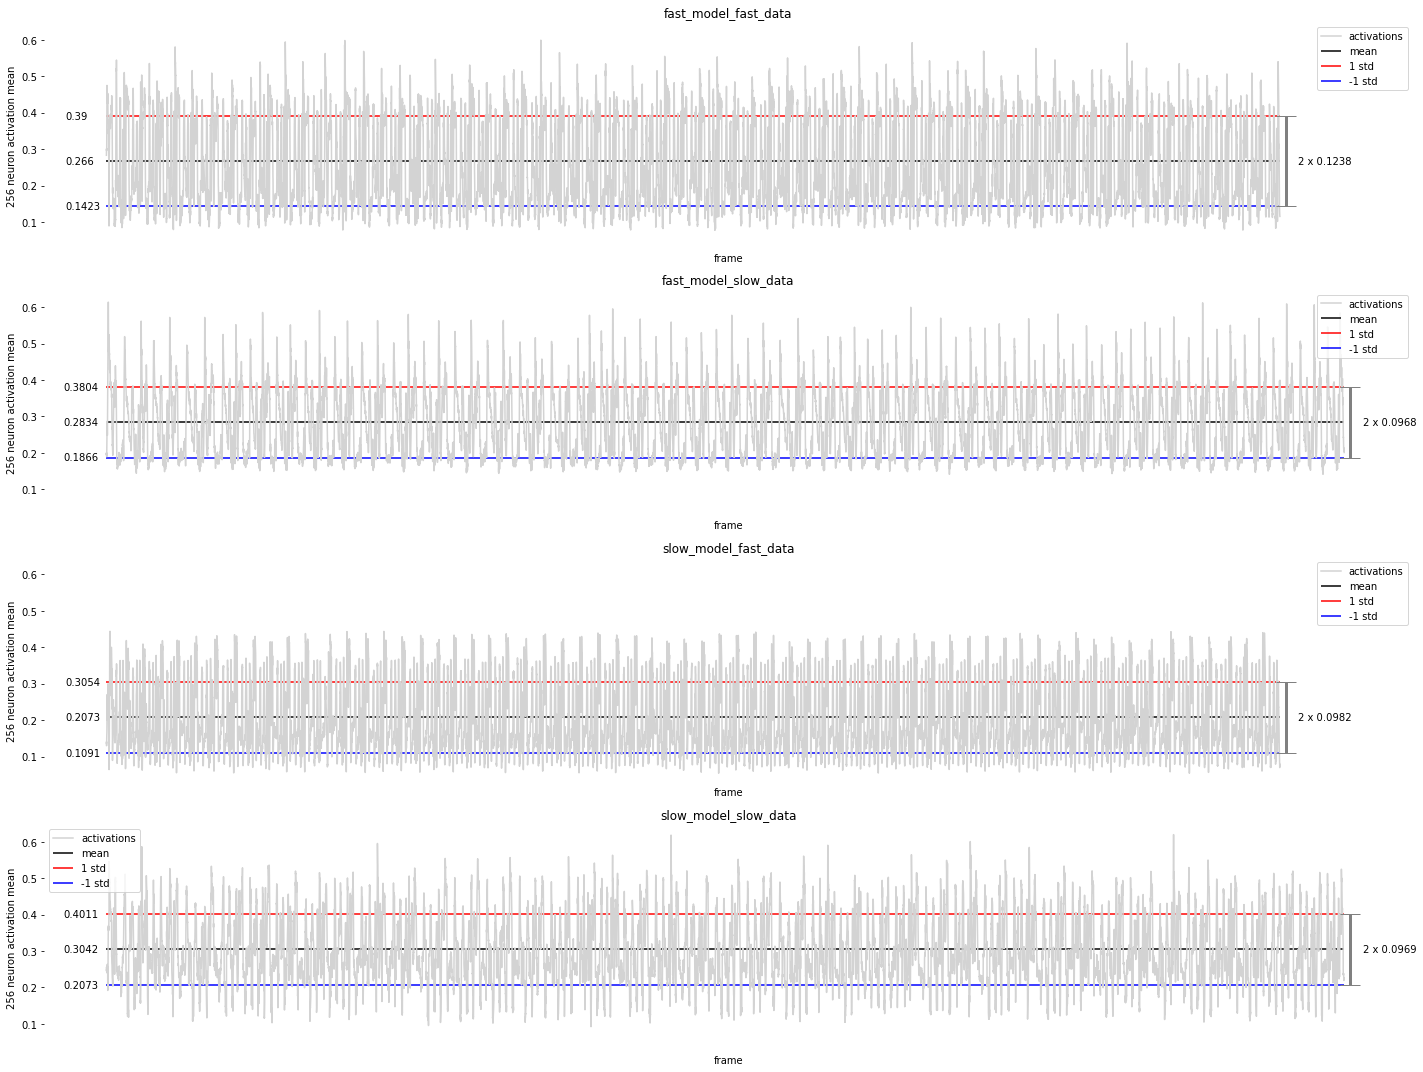

In [6]:
from matplotlib import pyplot as plt

frame_activations = dict(
    fast_model_fast_data=fast_model_fast_data.mean(axis=1),
    fast_model_slow_data=fast_model_slow_data.mean(axis=1),
    slow_model_fast_data=slow_model_fast_data.mean(axis=1),
    slow_model_slow_data=slow_model_slow_data.mean(axis=1),
)


def plot_activations(activations, ylabel, xlabel):
    fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 15), sharex='all', sharey='all')
    for (name, data), ax in zip(activations.items(), axs.flat):
        ax.set(title=name, ylabel=ylabel, xlabel=xlabel)
        # ax.grid(True, axis='y')
        ax.plot(data, 'lightgrey', label='activations')
        linewtext(ax, len(data), data.mean(), 'mean', 'black')
        linewtext(ax, len(data), data.mean() + data.std(), '1 std', 'red')
        linewtext(ax, len(data), data.mean() - data.std(), '-1 std', 'blue')
        two_std_bar(ax, data)
        ax.legend()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.get_xaxis().set_ticks([])
    fig.tight_layout()
    plt.show()


def two_std_bar(ax, data):
    ax.errorbar(1.005 * len(data), data.mean(), yerr=data.std(), ecolor='grey', elinewidth=3, capsize=10)
    ax.text(1.015 * len(data), data.mean(), f'2 x {data.std():.4f}', ha='left', va='center')


def linewtext(ax, length, value, label, color):
    ax.text(-0.035 * length, value, value, ha='left', va='center')
    ax.hlines(value, 0, length, color, label=label)


plot_activations(frame_activations, '256 neuron activation mean', 'frame')

In [7]:
for name, data in frame_activations.items():
    print(f'{name} mean:{data.mean():.4f}, standard deviation: {np.std(data):.4f}')



fast_model_fast_data mean:0.2661, standard deviation: 0.1238
fast_model_slow_data mean:0.2834, standard deviation: 0.0968
slow_model_fast_data mean:0.2073, standard deviation: 0.0982
slow_model_slow_data mean:0.3042, standard deviation: 0.0969


In [8]:
fast_model_fast_data_neuron_means = np.mean(fast_model_fast_data, axis=0)
fast_model_slow_data_neuron_means = np.mean(fast_model_slow_data, axis=0)
slow_model_fast_data_neuron_means = np.mean(slow_model_fast_data, axis=0)
slow_model_slow_data_neuron_means = np.mean(slow_model_slow_data, axis=0)

[d.mean() for d in [
    fast_model_fast_data_neuron_means,
    fast_model_slow_data_neuron_means,
    slow_model_fast_data_neuron_means,
    slow_model_slow_data_neuron_means,
]]

[0.266, 0.2837, 0.2073, 0.3042]

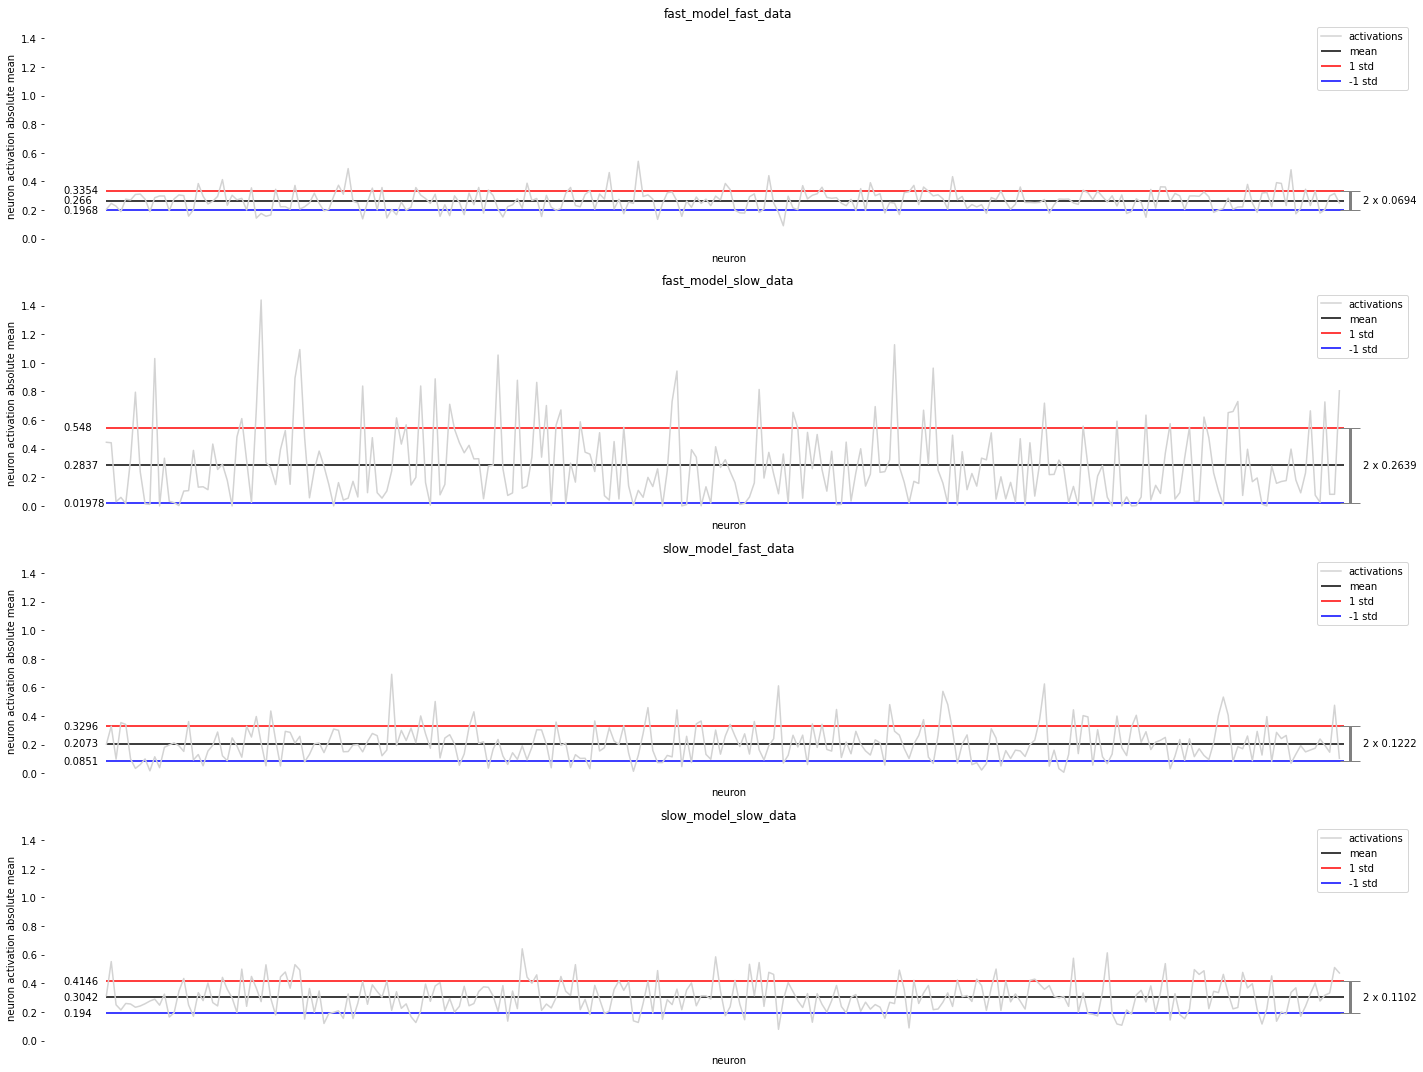

In [9]:
neuron_activations = dict(
    fast_model_fast_data=fast_model_fast_data.mean(axis=0),
    fast_model_slow_data=fast_model_slow_data.mean(axis=0),
    slow_model_fast_data=slow_model_fast_data.mean(axis=0),
    slow_model_slow_data=slow_model_slow_data.mean(axis=0),
)

plot_activations(neuron_activations, 'neuron activation absolute mean', 'neuron')

In [10]:
for name, data in neuron_activations.items():
    print(f'{name} mean:{data.mean():.4f}, standard deviation: {np.std(data):.4f}')



fast_model_fast_data mean:0.2661, standard deviation: 0.0694
fast_model_slow_data mean:0.2837, standard deviation: 0.2639
slow_model_fast_data mean:0.2073, standard deviation: 0.1222
slow_model_slow_data mean:0.3042, standard deviation: 0.1102


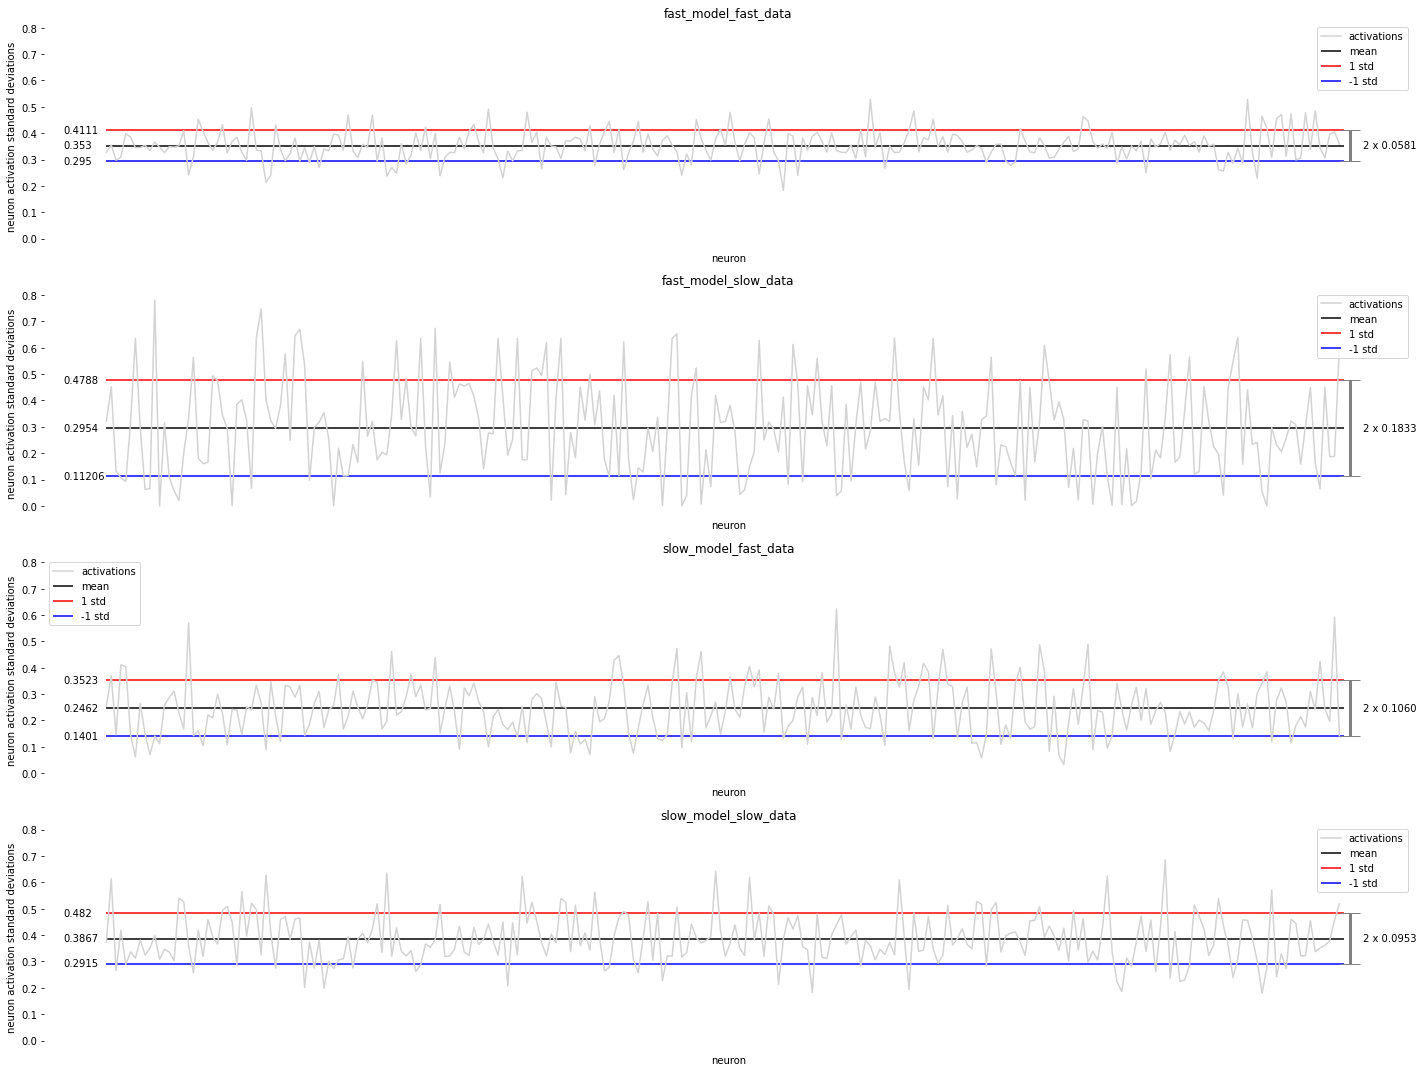

In [11]:
neuron_activations = dict(
    fast_model_fast_data=fast_model_fast_data.std(axis=0),
    fast_model_slow_data=fast_model_slow_data.std(axis=0),
    slow_model_fast_data=slow_model_fast_data.std(axis=0),
    slow_model_slow_data=slow_model_slow_data.std(axis=0),
)

plot_activations(neuron_activations, 'neuron activation standard deviations', 'neuron')

In [12]:
for name, data in neuron_activations.items():
    print(f'{name} mean:{data.mean():.4f}, standard deviation: {np.std(data):.4f}')


fast_model_fast_data mean:0.3530, standard deviation: 0.0581
fast_model_slow_data mean:0.2954, standard deviation: 0.1833
slow_model_fast_data mean:0.2462, standard deviation: 0.1060
slow_model_slow_data mean:0.3867, standard deviation: 0.0953


In [13]:

fast_model_fast_data_neuron_std = np.std(fast_model_fast_data, axis=0)
fast_model_slow_data_neuron_std = np.std(fast_model_slow_data, axis=0)
slow_model_fast_data_neuron_std = np.std(slow_model_fast_data, axis=0)
slow_model_slow_data_neuron_std = np.std(slow_model_slow_data, axis=0)

[d.std() for d in [
    fast_model_fast_data_neuron_std,
    fast_model_slow_data_neuron_std,
    slow_model_fast_data_neuron_std,
    slow_model_slow_data_neuron_std,
]]

[0.0581, 0.1833, 0.106, 0.09534]

In [14]:
fast_model_fast_data_neuron_std.shape

(256,)

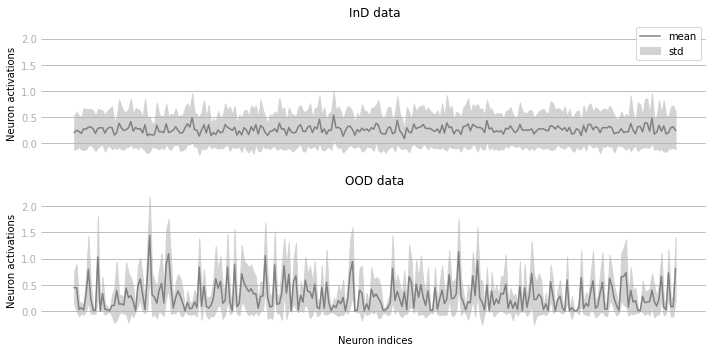

In [61]:

import matplotlib as mpl


def plot_activations_like_in_react(activations, axis, xlabel, ylabel):
    fig, axs = plt.subplots(nrows=len(activations), ncols=1, figsize=(10, 5), sharex='all', sharey='all')
    for (name, data), ax in zip(activations.items(), axs.flat):
        means = data.mean(axis=axis)
        x = range(data.shape[axis-1])
        ax.plot(x, means, c='grey', label='mean')
        ax.set(title=name)
        stds = data.std(axis=axis)
        ax.fill_between(x, means - stds, means + stds, color='lightgrey', label='std')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.get_xaxis().set_ticks([])
        ax.grid(True, axis='y')
        ax.tick_params(axis='y', colors=mpl.rcParams['grid.color'])

        axs.flat[0].set(ylabel=ylabel)
        axs.flat[0].legend()
        axs.flat[1].set(ylabel=ylabel, xlabel=xlabel)
    fig.tight_layout()
    plt.show()


neuron_activations = {'InD data': fast_model_fast_data,
                      'OOD data': fast_model_slow_data
                      }

plot_activations_like_in_react(neuron_activations, axis=0, xlabel='Neuron indices', ylabel='Neuron activations')

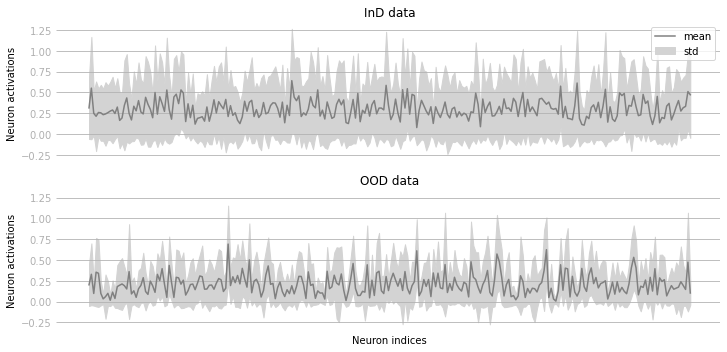

In [62]:

neuron_activations = {
                      'InD data': slow_model_slow_data,
                      'OOD data': slow_model_fast_data,
                      }
plot_activations_like_in_react(neuron_activations, axis=0, xlabel='Neuron indices', ylabel='Neuron activations')


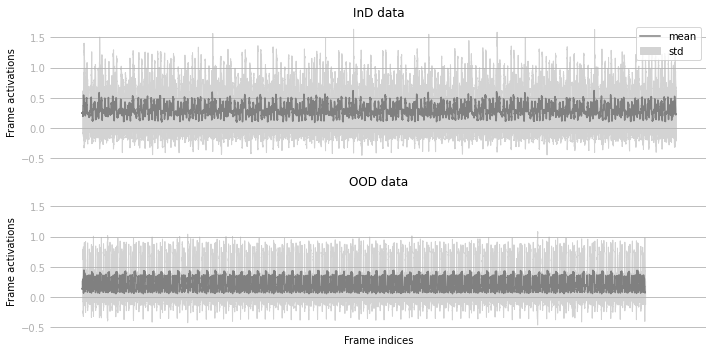

In [63]:
plot_activations_like_in_react(neuron_activations, axis=1, xlabel='Frame indices', ylabel='Frame activations')


In [64]:
for name, data in neuron_activations.items():
    print(f'{name} mean:{np.mean(data):.4f}')

InD data mean:0.3042
OOD data mean:0.2073


In [50]:
neuron_activations = {
    'Fast model InD data': fast_model_fast_data,
    'Fast model OOD data': fast_model_slow_data,
    'Slow model InD data': slow_model_slow_data,
    'Slow model OOD data': slow_model_fast_data,
}

In [51]:

from scipy.stats import skew

for name, data in neuron_activations.items():
    print(f'{name} skewness of mean of shape {data.mean(axis=0).shape}:{skew(data.mean(axis=0)):.4f}')

Fast mode InD data skewness of mean of shape (256,):0.5508
Fast model OOD data skewness of mean of shape (256,):1.2480
Slow model InD data skewness of mean of shape (256,):0.4766
Slow model OOD data skewness of mean of shape (256,):0.9458


In [52]:
for name, data in neuron_activations.items():
    print(f'{name} mean of skewness of shape {skew(data, axis=1).shape} :{skew(data, axis=1).mean():.4f}')

/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Fast mode InD data mean of skewness of shape (19250,) :1.5635
Fast model OOD data mean of skewness of shape (20304,) :1.6707
Slow model InD data mean of skewness of shape (20304,) :1.4697
Slow model OOD data mean of skewness of shape (19250,) :1.5382


In [53]:
for name, data in neuron_activations.items():
    print(f'{name} std of skewness of shape {skew(data, axis=1).shape} :{skew(data, axis=1).std():.4f}')

Fast mode InD data std of skewness of shape (19250,) :0.8455
Fast model OOD data std of skewness of shape (20304,) :0.4483
Slow model InD data std of skewness of shape (20304,) :0.5340
Slow model OOD data std of skewness of shape (19250,) :0.7581


/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


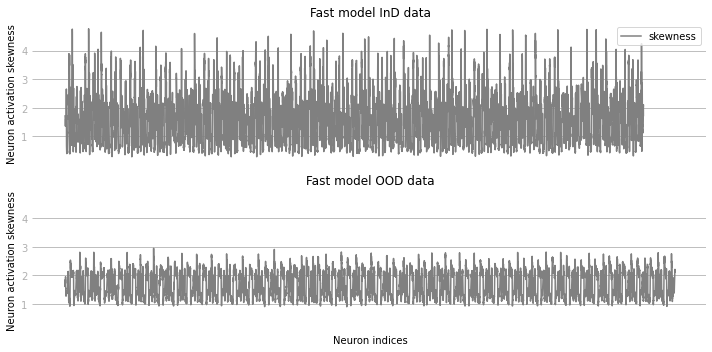

In [68]:

def plot_activations_skew(activations, xlabel, ylabel):
    fig, axs = plt.subplots(nrows=len(activations), ncols=1, figsize=(10, 5), sharex='all', sharey='all')
    for (name, data), ax in zip(activations.items(), axs.flat):
        x = range(len(data))
        ax.plot(x, data, c='grey', label='skewness')
        ax.set(title=name)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.get_xaxis().set_ticks([])
        ax.grid(True, axis='y')
        ax.tick_params(axis='y', colors=mpl.rcParams['grid.color'])

        axs.flat[0].set(ylabel=ylabel)
        axs.flat[0].legend()
        axs.flat[1].set(ylabel=ylabel, xlabel=xlabel)
    fig.tight_layout()
    plt.show()


neuron_activation_skewnesses = {
    'Fast model InD data': skew(fast_model_fast_data, axis=1),
    'Fast model OOD data': skew(fast_model_slow_data, axis=1),
}

plot_activations_skew(neuron_activation_skewnesses, xlabel='Neuron indices', ylabel='Neuron activation skewness')


/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


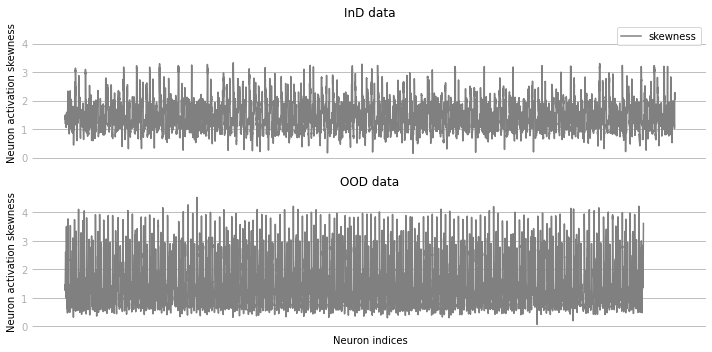

In [69]:

neuron_activation_skewnesses = {
    'InD data': skew(slow_model_slow_data, axis=1),
    'OOD data': skew(slow_model_fast_data, axis=1),
}

plot_activations_skew(neuron_activation_skewnesses, xlabel='Neuron indices', ylabel='Neuron activation skewness')


/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


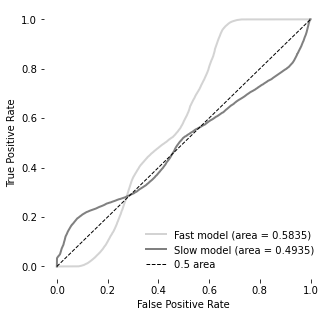

In [78]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc


def plot_curve(ax, data, title_part, color):
    y_true = data[:, 0]
    y_score = data[:, 1]
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    ax.plot(
        fpr,
        tpr,
        color=color,
        lw=2,
        label=f"{title_part} (area = %0.4f)" % roc_auc,
    )

fig, ax = plt.subplots(figsize=(5, 5))

skewness_test_fast = skew(fast_model_fast_data, axis=1)
skewness_ood_fast = skew(fast_model_slow_data, axis=1)
skewness_test_slow = skew(slow_model_slow_data, axis=1)
skewness_ood_slow = skew(slow_model_fast_data, axis=1)

fast_IND_skewness = np.vstack([np.zeros(len(skewness_test_fast)), skewness_test_fast]).T
fast_OOD_skewness = np.vstack([np.ones(len(skewness_ood_fast)), skewness_ood_fast]).T
slow_IND_skewness = np.vstack([np.zeros(len(skewness_test_slow)), skewness_test_slow]).T
slow_OOD_skewness = np.vstack([np.ones(len(skewness_ood_slow)), skewness_ood_slow]).T


plot_curve(ax, np.concatenate((fast_IND_skewness, fast_OOD_skewness,)), 'Fast model', 'lightgrey')
plot_curve(ax, np.concatenate((slow_IND_skewness, slow_OOD_skewness,)), 'Slow model', 'grey')
ax.plot([0, 1], [0, 1], color="black", lw=1, linestyle="--", label='0.5 area')
ax.set(xlabel= "False Positive Rate", ylabel = "True Positive Rate")


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend(frameon=False, loc="lower right")

plt.show()


In [72]:

pinf = float('+inf')
ninf = float('-inf')

skewness_test_fast = skew(fast_model_fast_data)
skewness_ood_fast = skew(fast_model_slow_data)
skewness_test_slow = skew(slow_model_slow_data)
skewness_ood_slow = skew(slow_model_fast_data)

fast_IND_skewness = np.vstack([np.zeros(len(skewness_test_fast)), skewness_test_fast]).T
fast_OOD_skewness = np.vstack([np.ones(len(skewness_ood_fast)), skewness_ood_fast]).T
slow_IND_skewness = np.vstack([np.zeros(len(skewness_test_slow)), skewness_test_slow]).T
slow_OOD_skewness = np.vstack([np.ones(len(skewness_ood_slow)), skewness_ood_slow]).T


plot_curve(ax, np.concatenate((fast_IND_skewness, fast_OOD_skewness,)), 'Fast model', 'lightgrey')
plot_curve(ax, np.concatenate((slow_IND_skewness, slow_OOD_skewness,)), 'Slow model', 'grey')
ax.plot([0, 1], [0, 1], color="black", lw=1, linestyle="--", label='0.5 area')
ax.set(xlabel= "False Positive Rate", ylabel = "True Positive Rate")

plt.title('Frame skewness ROC curves')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend(frameon=False, loc="lower right")

plt.show()

/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7/site-packages/scipy/stats/stats.py:1234: RuntimeWarning: divide by zero encountered in true_divide
  lambda m2, m3: m3 / m2**1.5,
/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7/site-packages/scipy/stats/stats.py:1234: RuntimeWarning: invalid value encountered in true_divide
  lambda m2, m3: m3 / m2**1.5,


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [76]:
np.concatenate((fast_IND_skewness, fast_OOD_skewness))


array([[0.        , 2.23632812],
       [0.        , 2.00976562],
       [0.        , 1.39648438],
       ...,
       [1.        , 3.02734375],
       [1.        , 3.125     ],
       [1.        , 0.76318359]])